In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [49]:
df = pd.read_csv('Advertising.csv')

In [50]:
df.head()


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [51]:
X = df.drop('sales',axis=1)

In [52]:
y = df['sales']

In [53]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [54]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [55]:
poly_features = polynomial_converter.transform(X)

In [56]:
poly_features.shape

(200, 9)

In [57]:
X.iloc[0]

,0
TV,230.1
radio,37.8
newspaper,69.2


In [58]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [59]:
37.8*69.2


2615.7599999999998

In [60]:
polynomial_converter.fit_transform(X)


array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [61]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [62]:
model = LinearRegression()

In [63]:
model.fit(X_train, y_train)

LinearRegression()

In [64]:
test_predictions = model.predict(X_test)

In [65]:
model.coef_

array([ 0.05478172,  0.01311214,  0.01086391, -0.00011074,  0.00108048,
       -0.00010764,  0.00030191,  0.00017541,  0.00010075])

In [66]:
MAE = mean_absolute_error(y_test,test_predictions)

In [67]:
MSE = mean_squared_error(y_test,test_predictions)

In [68]:
RMSE = np.sqrt(MSE)

In [72]:
MAE

0.5905974833808105

In [70]:
MSE

0.52319449490555

In [71]:
RMSE

0.7233218473857609

In [73]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [74]:
X.iloc[0]

,0
TV,230.1
radio,37.8
newspaper,69.2


In [75]:
69.2**2

4788.64

**Choosing the optimal model complexity in polynomial regression**

In [ ]:
#create the different order poly
#split poly feat train/test
#fit on train
#store/save the rmse for BOTH for train and test
#PLOT the results (error vs poly order)

In [76]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
  poly_converter = PolynomialFeatures(degree=d,include_bias=False)
  poly_features = poly_converter.fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

  model = LinearRegression()
  model.fit(X_train, y_train)

  test_predictions = model.predict(X_test)
  train_predictions = model.predict(X_train)

  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)

  train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
  test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))

  train_rmse_errors.append(train_rmse)
  test_rmse_errors.append(test_rmse)



In [77]:
train_rmse_errors

[1.5745968305905442,
 0.5950712355838926,
 0.46887581118220906,
 0.36946897017714747,
 0.2438220623995386,
 0.19536222662635988,
 0.5205396234829139,
 0.18800269755852106,
 0.11965697597801685]

In [78]:
test_rmse_errors

[1.9485372043446394,
 0.7233218473857609,
 0.5392350985677339,
 1.3032266057078963,
 5.946749503226517,
 25.388301461020912,
 617.116555233886,
 6267.892323299931,
 183316.24115924895]

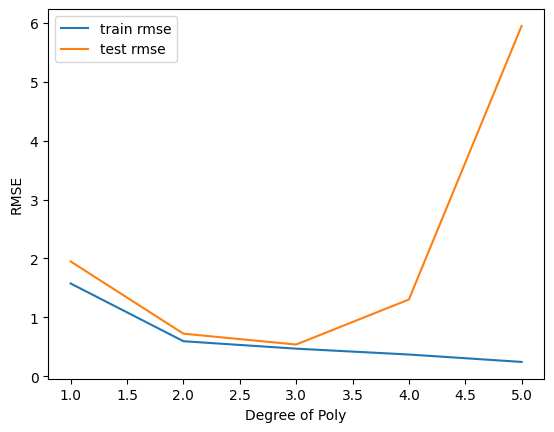

In [84]:
plt.plot(range(1,6),train_rmse_errors[:5],label='train rmse')
plt.plot(range(1,6),test_rmse_errors[:5],label='test rmse')

plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend()

In [88]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)


In [89]:
final_model = LinearRegression()

In [90]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [91]:
from joblib import dump,load

In [92]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [93]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

In [94]:
loaded_converter = load('final_converter.joblib')

In [95]:
loaded_model = load('final_poly_model.joblib')

In [97]:
campaign = [[149,22,12]]

In [101]:
transformed_data = loaded_converter.fit_transform(campaign)

In [102]:
loaded_model.predict(transformed_data)

array([14.64501014])